<a href="https://colab.research.google.com/github/NikolinaBijelic/NikolinaBijelicIT49g2018PPPO/blob/main/Nikolina_Bijelic_it49g2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predmet**: Principi prezentacije i prepoznavanja oblika
**Student**: Nikolina Bijelić IT 49-2018

U ovom projektom zadatku je izvršena **detekcija**, kao i **klasifikacija** svih nastalih oštećenja na metalnim površinama. 


Kako je set podataka, odnosno, u ovom slučaju set fotografija na podignut na Google Drive, preciznije u folderu *images*, potrebno je učitavanje istih. 

In [59]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS" -O images.zip && rm -rf /tmp/cookies.txt


--2023-01-24 20:58:11--  https://docs.google.com/uc?export=download&confirm=t&id=1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS
Resolving docs.google.com (docs.google.com)... 74.125.137.113, 74.125.137.102, 74.125.137.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pgbjhgl1qk3t2r3l0sn3kq9r1j9d4mfa/1674593850000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=283ec268-8ebd-4036-be27-791463566081 [following]
--2023-01-24 20:58:12--  https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pgbjhgl1qk3t2r3l0sn3kq9r1j9d4mfa/1674593850000/06049624160957438625/*/1swD3_-acnDAOigOiZlKlf-a5OPw7ebNS?e=download&uuid=283ec268-8ebd-4036-be27-791463566081
Resolving doc-0g-64-docs.googleusercontent.com (doc-0g-64-docs.googleusercontent.com)... 142.251.2.132, 2

In [2]:
!unzip images.zip


Streaming output truncated to the last 5000 lines.
  inflating: train_images/99f75320d.jpg  
  inflating: train_images/99f9d2375.jpg  
  inflating: train_images/99fd3c6f5.jpg  
  inflating: train_images/9a016fe15.jpg  
  inflating: train_images/9a064450d.jpg  
  inflating: train_images/9a08c2783.jpg  
  inflating: train_images/9a18e4457.jpg  
  inflating: train_images/9a1f7c238.jpg  
  inflating: train_images/9a2523ce9.jpg  
  inflating: train_images/9a3e774ff.jpg  
  inflating: train_images/9a5e9e77c.jpg  
  inflating: train_images/9a5f7a855.jpg  
  inflating: train_images/9a62177bb.jpg  
  inflating: train_images/9a67575cf.jpg  
  inflating: train_images/9a6ac5406.jpg  
  inflating: train_images/9a70057c0.jpg  
  inflating: train_images/9a72fd89e.jpg  
  inflating: train_images/9a75974ba.jpg  
  inflating: train_images/9a762b892.jpg  
  inflating: train_images/9a7b2f3af.jpg  
  inflating: train_images/9a7b427b4.jpg  
  inflating: train_images/9a81a8056.jpg  
  inflating: train_images

Nakon uspešno učitanih fotografija, slede linije koda koje će omogućiti uvećan prikaz fotografija iz prethodno učitanog i otpakovanog foldera *images*.

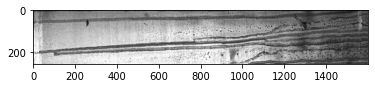

In [3]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
image =(imread('train_images/fd9b1a987.jpg'))
plt.imshow(image)
plt.show()

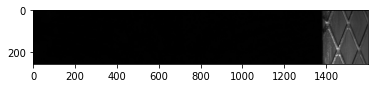

In [4]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
image =(imread('train_images/fd2f7b4f4.jpg'))
plt.imshow(image)
plt.show()

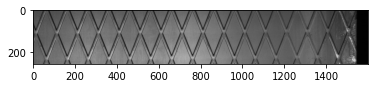

In [5]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
image =(imread('train_images/fd319a9a3.jpg'))
plt.imshow(image)
plt.show()

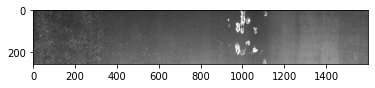

In [6]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
image =(imread('train_images/fd297963a.jpg'))
plt.imshow(image)
plt.show()

Kako se može uočiti na fotografijama su različite površine koje imaju nedostatke, odnosno oštećenja.


Kako bi bila izvršene kasifikacija i detekcija istih, potrebno je importovati određene biblioteke koje će omogućiti obavljanje različitih funkcija nad podacima, odnosno fotografijama. 

In [8]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import keras
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from keras.optimizers import adam_v2, sgd_experimental, rmsprop_v2
from keras.callbacks import Callback, EarlyStopping
from keras.utils import tf_utils
from sklearn.metrics import confusion_matrix
from keras import backend as K
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
     

In [17]:
from tensorflow.keras.utils import to_categorical


In [ ]:
Kako bi algoritam uspešno izvršio klasifikaciju, fotografije sa svojim vrednostima su učitane u CSV fajl.

In [9]:
dataset = pd.read_csv("/content/train.csv")

Da bi upoznavanje sa setom podataka, odnoso sa fotografijama, bilo što bolje, sledi nekoliko linija koda kroz koje je moguć detaljan uvid.

In [10]:
dataset

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [11]:
dataset.info

<bound method DataFrame.info of             ImageId  ClassId                                      EncodedPixels
0     0002cc93b.jpg        1  29102 12 29346 24 29602 24 29858 24 30114 24 3...
1     0007a71bf.jpg        3  18661 28 18863 82 19091 110 19347 110 19603 11...
2     000a4bcdd.jpg        1  37607 3 37858 8 38108 14 38359 20 38610 25 388...
3     000f6bf48.jpg        4  131973 1 132228 4 132483 6 132738 8 132993 11 ...
4     0014fce06.jpg        3  229501 11 229741 33 229981 55 230221 77 230468...
...             ...      ...                                                ...
7090  ffcf72ecf.jpg        3  121911 34 122167 101 122422 169 122678 203 122...
7091  fff02e9c5.jpg        3  207523 3 207777 9 208030 15 208283 22 208537 2...
7092  fffe98443.jpg        3  105929 5 106177 14 106424 24 106672 33 106923 ...
7093  ffff4eaa8.jpg        3  16899 7 17155 20 17411 34 17667 47 17923 60 18...
7094  ffffd67df.jpg        3  30931 43 31103 127 31275 211 31489 253 31745 2...

[7095 r

3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

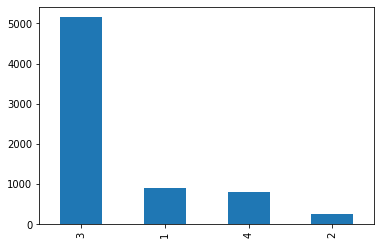

In [12]:
dataset["ClassId"].value_counts().plot(kind = 'bar')
dataset["ClassId"].value_counts()

Iz priloženog se može zaključiti da svaka fotografija ima svoj ID (*ImageId*), klasu kojoj primada (*ClassId*) i encodovane vrednosti piksela (*EncodedPixels*).

Kako smo detaljno i precizno upoznati sa fotografijama, može se otpočeti sa izvršavanjem **augmentacije**, tj. procesa transformacije nad istim tip fotografijama kako bi model bio što bolji.

Iz prethodno formiranog dataseta (*dataset*), učitavaju se fotografije i smeštaju u promenljivu *image*. Nakon toga sledi njihovo formatiranje u dimenzije 150 x 150, a potom i smeštanje u nizove *array1* i *array2*, gde *array1* predstavlja niz sa fotografijama, a *array2* niz sa njihovim klasama.




In [14]:
array1=[]
array2=[]
for img,ClassId,EncodedPixels in tqdm(dataset.values):
  image=cv2.imread("/content/train_images/{}".format(img), cv2.IMREAD_COLOR)
  image=cv2.resize(image, (150,150))
  array1.append(image)
  array2.append(ClassId)

100%|██████████| 7095/7095 [00:53<00:00, 132.63it/s]


Narednom linjom se učitava fotografija iz niza *array1* sa indeksom 20, kako bi se videlo uspešno formatiranje dimenzija.

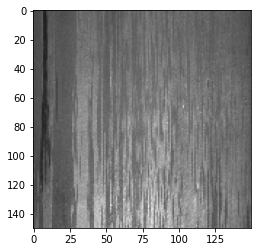

In [15]:
indeks = 20
plt.imshow(array1[indeks])

 Kako bi algoritam mogao da koristi i razume date piksele fotografija, potrebno ih je prevesti u numerički zapis, a za to je zadužena **normalizacija** podataka, odnosno piksela u ovom slučaju.

In [18]:
encoder = LabelEncoder()

x=np.array(array1)
x=x/255

y=encoder.fit_transform(array2)
y=to_categorical(y)

Sada kada su izvršene sve pripreme podataka, može se otpočeti sa **treniranjem** istih. 

Prvo je potrebno podeliti podatke na trening i test, i u ovom slučaju će to biti u razmeri 80:20.

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,shuffle=True)

In [21]:
print("X trening: ",x_train.shape)
print("X test: ",x_test.shape)
print("y trening: ",y_train.shape)
print("y test: ",y_test.shape)

X trening:  (5676, 150, 150, 3)
X test:  (1419, 150, 150, 3)
y trening:  (5676, 4)
y test:  (1419, 4)


Sada je konačno moguće napraviti model, i to CNN (*Convolutional Neural Network*)model dubokog učenja kojim će se izvršiti klasifikacija. 

In [22]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

Narednom linijom omugućava se prikaz gore izgrađenog CNN modela.

In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 256)               3

In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,mode="min",monitor="val_loss",restore_best_weights=True)


Pre treninga podataka, potrebno je izvršiti odredjene konfiguracije, odnosno **kompajliranja** modela, te se inportuje metoda *compile*. 

In [26]:
from sklearn import metrics
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
     

Konačno je moguće izvršiti i **TRENIRANJE** podataka i to metodom *fit* gde
**X_train** predstavlja ulazni niz podataka,
**y_train** ciljane vrednosti
**epochs** broj iteracija nad setom podataka
**validation_data** - podaci na osnovu kojih treba proceniti gubitak
**batch_size**  broj uzoraka pri svakom pojedinačnom spustu
**verbose** kao režim opširnosti i na kraju
**callbacks** lista instanci koje se izvršavaju tokom treninga

In [29]:
history = model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),batch_size=128,
                    verbose=1, callbacks=[early_stopping])

Epoch 1/20
45/45 [==============================] - 116s 3s/step - loss: 0.8079 - accuracy: 0.7322 - val_loss: 0.7127 - val_accuracy: 0.7421
Epoch 2/20
45/45 [==============================] - 113s 3s/step - loss: 0.6777 - accuracy: 0.7465 - val_loss: 0.6860 - val_accuracy: 0.7442
Epoch 3/20
45/45 [==============================] - 113s 3s/step - loss: 0.6385 - accuracy: 0.7523 - val_loss: 0.6319 - val_accuracy: 0.7498
Epoch 4/20
45/45 [==============================] - 112s 3s/step - loss: 0.5819 - accuracy: 0.7676 - val_loss: 0.6048 - val_accuracy: 0.7533
Epoch 5/20
45/45 [==============================] - 114s 3s/step - loss: 0.5514 - accuracy: 0.7692 - val_loss: 0.5624 - val_accuracy: 0.7597
Epoch 6/20
45/45 [==============================] - 112s 2s/step - loss: 0.5219 - accuracy: 0.7845 - val_loss: 0.5579 - val_accuracy: 0.7766
Epoch 7/20
45/45 [==============================] - 112s 2s/step - loss: 0.4945 - accuracy: 0.7868 - val_loss: 0.5822 - val_accuracy: 0.7632
Epoch 8/20
45

Kako bi se vizuelno prikazali rezultati ovog treniga, koristiće se grafovi.

Prvi prikazuje funkciju gubitka, a drugi tačnost.

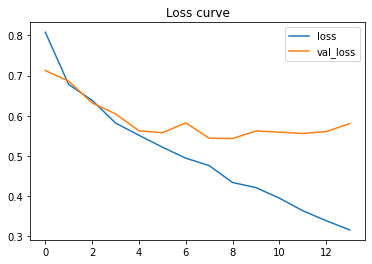

In [30]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

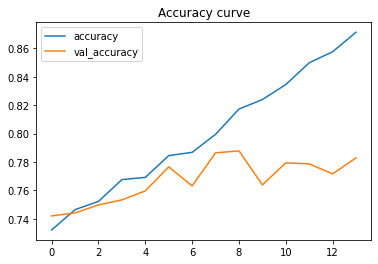

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

Sledi tačnost predviđanja klasa slika, prilikom koje se dobija rezultat od 78.79%.

In [33]:
result = model.evaluate(x_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

45/45 [==============================] - 8s 169ms/step - loss: 0.5433 - accuracy: 0.7879
[+] Accuracy: 78.79%


Ostalo je izvršiti **detekciju** oštećenja. Proces je započet smeštanjem train.cvs fajla u promenljivu *dataframe*, te detaljnijim prikazom sadržaja samog fajla.

In [34]:
import random


In [35]:
dataframe = pd.read_csv('/content/train.csv')


In [36]:
print('Dataframe shape: ', dataframe.shape)
dataframe.head()

Dataframe shape:  (7095, 3)


,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [38]:
dataframe['ImageId'] = dataframe['ImageId'].apply(lambda x: x.strip())
dataframe.ImageId.describe()

count              7095
unique             6666
top       ef24da2ba.jpg
freq                  3
Name: ImageId, dtype: object

In [41]:
train_img_set = set(list(os.listdir('train_images')))
print('Broj fotografija u train_images folderu je: ', len(train_img_set))
defect_img_set = set(dataframe['ImageId'].values)
print('Broj fotografija u fajlu train.csv je: ', len(defect_img_set))
if (defect_img_set.issubset(train_img_set)):
    print('ImageId koji su u train.csv se nalaze i u train_images folderu.')

Broj fotografija u train_images folderu je:  12568
Broj fotografija u fajlu train.csv je:  6666
ImageId koji su u train.csv se nalaze i u train_images folderu.


Broj ImageId-ijeva koji nemaju oštećenja je:  5902


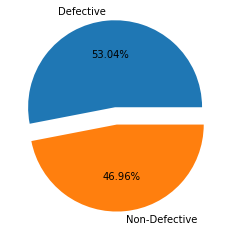

In [43]:
print('Broj ImageId-ijeva koji nemaju oštećenja je: ', len(train_img_set) - len(defect_img_set))
non_defect_img_set = train_img_set - defect_img_set

plt.pie([len(defect_img_set), len(non_defect_img_set)], labels = ['Defective', 'Non-Defective'], explode = [0.1]*2, startangle = 0, autopct='%1.2f%%')
plt.show()

In [45]:
dataframe['ClassId'].astype('str').describe()


count     7095
unique       4
top          3
freq      5150
Name: ClassId, dtype: object

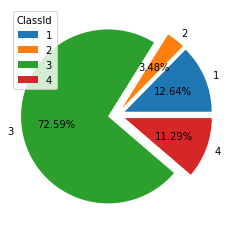

,ClassId,Count,count-percentage
0,1,897,12.642706
1,2,247,3.481325
2,3,5150,72.586328
3,4,801,11.289641


In [48]:
ClassId_cnt_df = pd.DataFrame(dataframe['ClassId'].value_counts().sort_index()).rename(columns = {'ClassId':'Count'})
ClassId_cnt_df['count-percentage'] = ClassId_cnt_df*100/ClassId_cnt_df.sum()

plt.pie(ClassId_cnt_df['Count'], labels = ClassId_cnt_df['Count'].index, explode = [0.1]*4, startangle = 0, autopct='%1.2f%%')
plt.legend(title = "ClassId")
plt.show()

ClassId_cnt_df.reset_index().rename(columns = {'index':'ClassId'})

In [50]:
nos_labels_per_img_df = dataframe.groupby('ImageId')['ClassId'].count()#reset_index()#.rename(columns = {'ClassId':'Count'})
nos_labels_per_img_df.head(10)

ImageId
0002cc93b.jpg    1
0007a71bf.jpg    1
000a4bcdd.jpg    1
000f6bf48.jpg    1
0014fce06.jpg    1
0025bde0c.jpg    2
002af848d.jpg    1
002fc4e19.jpg    2
0030401a5.jpg    1
0046839bd.jpg    1
Name: ClassId, dtype: int64

In [51]:
data = nos_labels_per_img_df.value_counts().sort_index()
for index, value in data.items():
    print("Number of images with {} number of defect labels: {}".format(index, value))

Number of images with 1 number of defect labels: 6239
Number of images with 2 number of defect labels: 425
Number of images with 3 number of defect labels: 2


In [52]:
img_shapes = set()
for img in list(os.listdir('train_images')):
    img_shapes.add(cv2.imread('train_images/'+img).shape)
img_shapes

{(256, 1600, 3)}

In [53]:
def rle2mask(mask_rle, shape=(1600,256)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (width,height) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

Na samom kraju prolazi se kroz ceo set podataka, te se svakoj fotgrafiji generiše odgovarajuća maska, što je moguće uočiti na fotografijama ispod. Leva kolona su prave fotografije, a desna kologa prikazuje njihove maske. Radi preglednosti prikazano je samo po 5 fotografija iz svake klase.

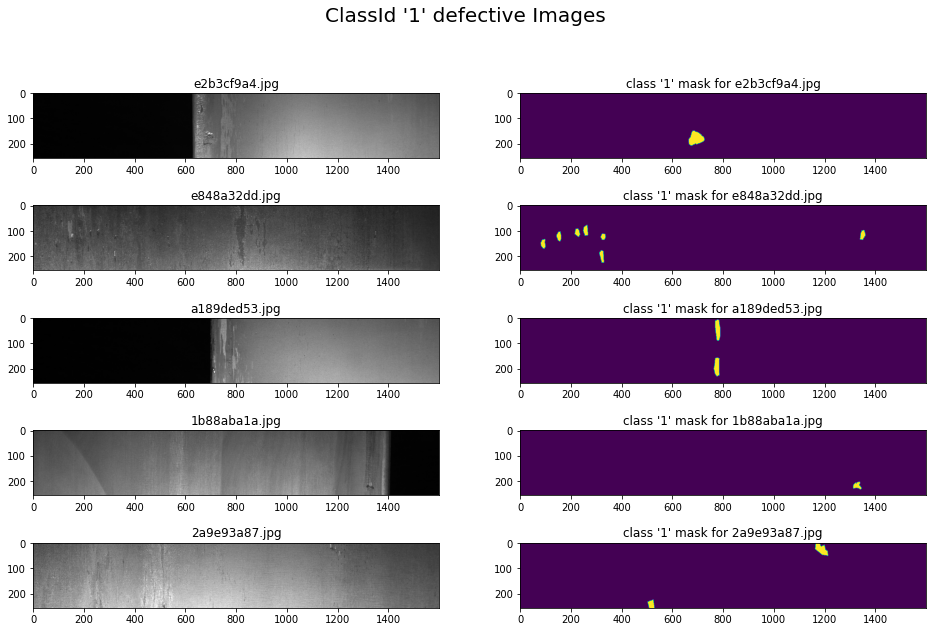

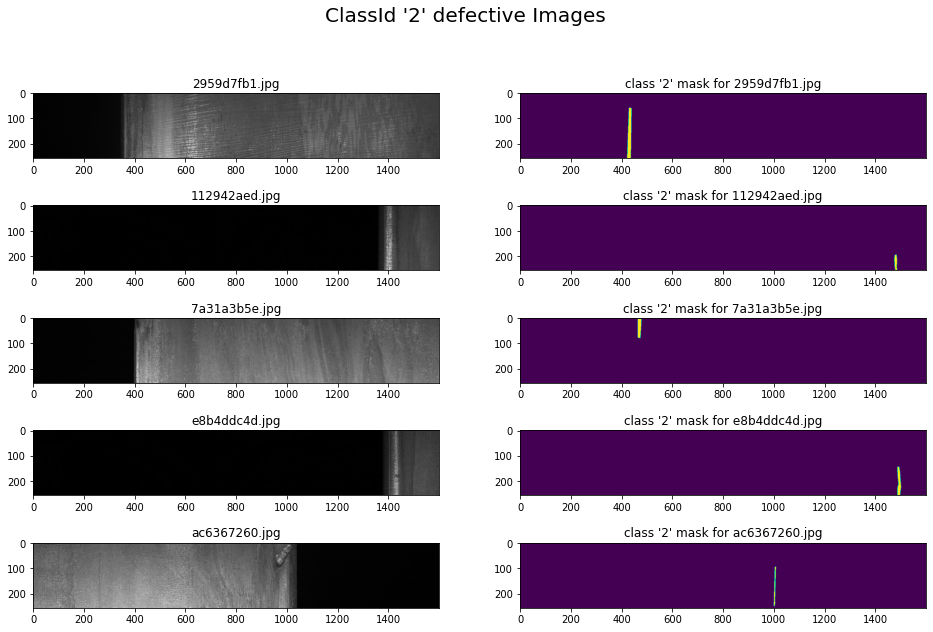

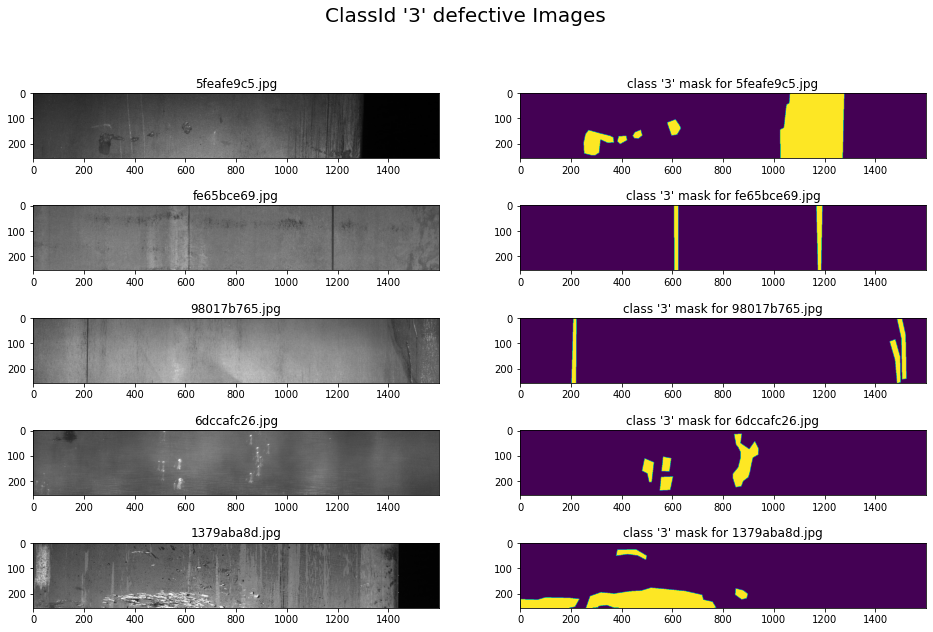

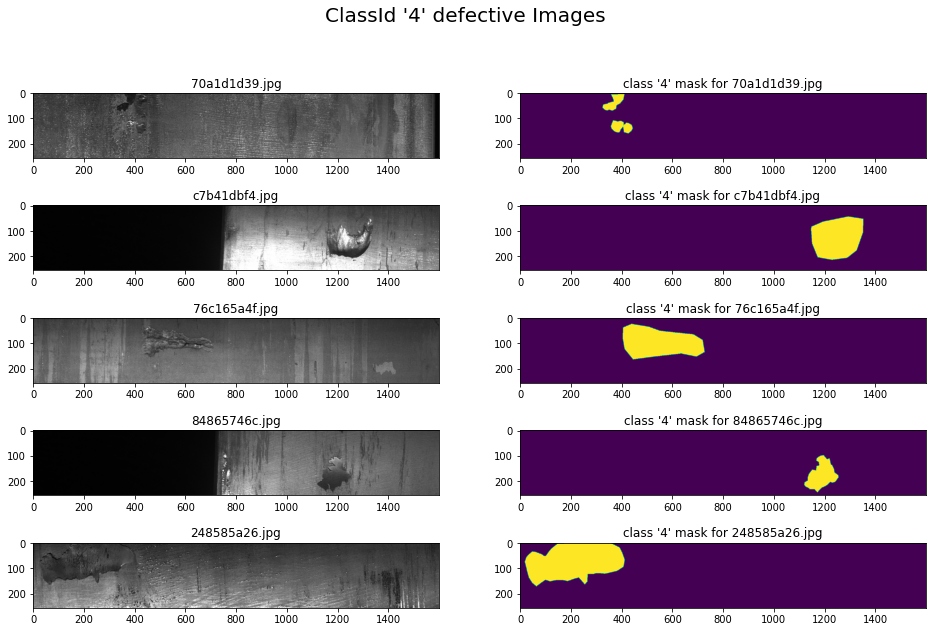

In [57]:
for ClassId in [1,2,3,4]:
    class_df = dataframe[dataframe['ClassId'] == ClassId]
    fig, axs = plt.subplots(5, 2, figsize=(16,10))
    fig.suptitle("ClassId '{}' defective Images".format(ClassId), fontsize=20)
    x,y = 0,0
    for i, img_id in enumerate(random.sample(set(class_df['ImageId'].values), 5)):
        img_obj = cv2.imread('train_images/'+ img_id)
        axs[i,0].imshow(img_obj)
        axs[i,0].set_title(img_id)
        rle = class_df[class_df['ImageId'] == img_id]['EncodedPixels'].iloc[0]
        mask = rle2mask(rle)
        axs[i,1].imshow(mask)
        axs[i,1].set_title("class '{}' mask for ".format(ClassId) + img_id)
    plt.show()
    print('='*100)

**Zaključak**


Nakon 14 prolazaka kroz set podataka, kada model prestaje da daje bolje rezultate, dostiguta je tačnost od čitavih 78.79%, što smatram poprlično dobrim rezultatom.

Takodje, kreiran je modela algoritma koji ima za zadatak da na što bolji način detektuje oštećenja i klasifikuje fotografije primenom CNN vrste neuronske mreže.


Iako smatram da su rezultati ovog projekta, odnosno tačnosti algoritma poprilično dobri, uvek postoji prostora za unapredjenje i nadogradnju u cilju dostizanja još boljeg rezltata.



**Literatura**



1. Vežbe 9, 10.
2. The Hundred-Page Machine Learning, Andriy Burkov
3. scikit-learn
4. Model training APIs, Keras